#Import required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Load the data set

In [2]:

# Load the dataset
file_path = "/content/menu.csv"
df = pd.read_csv(file_path)


In [3]:
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


#Read the data set

In [4]:

#Display shape of the DataFrame
print("Shape of the DataFrame (rows, columns):", df.shape)

#Display size of the DataFrame
print("Size of the DataFrame (total elements):", df.size)

#Display info of the DataFrame
print("DataFrame Information:")
df.info()

Shape of the DataFrame (rows, columns): (260, 24)
Size of the DataFrame (total elements): 6240
DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64

#Cheacking NULL  values

In [5]:

# Check for null values
print("Null values present in each column:")
print(df.isnull().sum())


Null values present in each column:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [6]:
print("There is no NULL values in the data set")

There is no NULL values in the data set


In [7]:

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')



#outliers

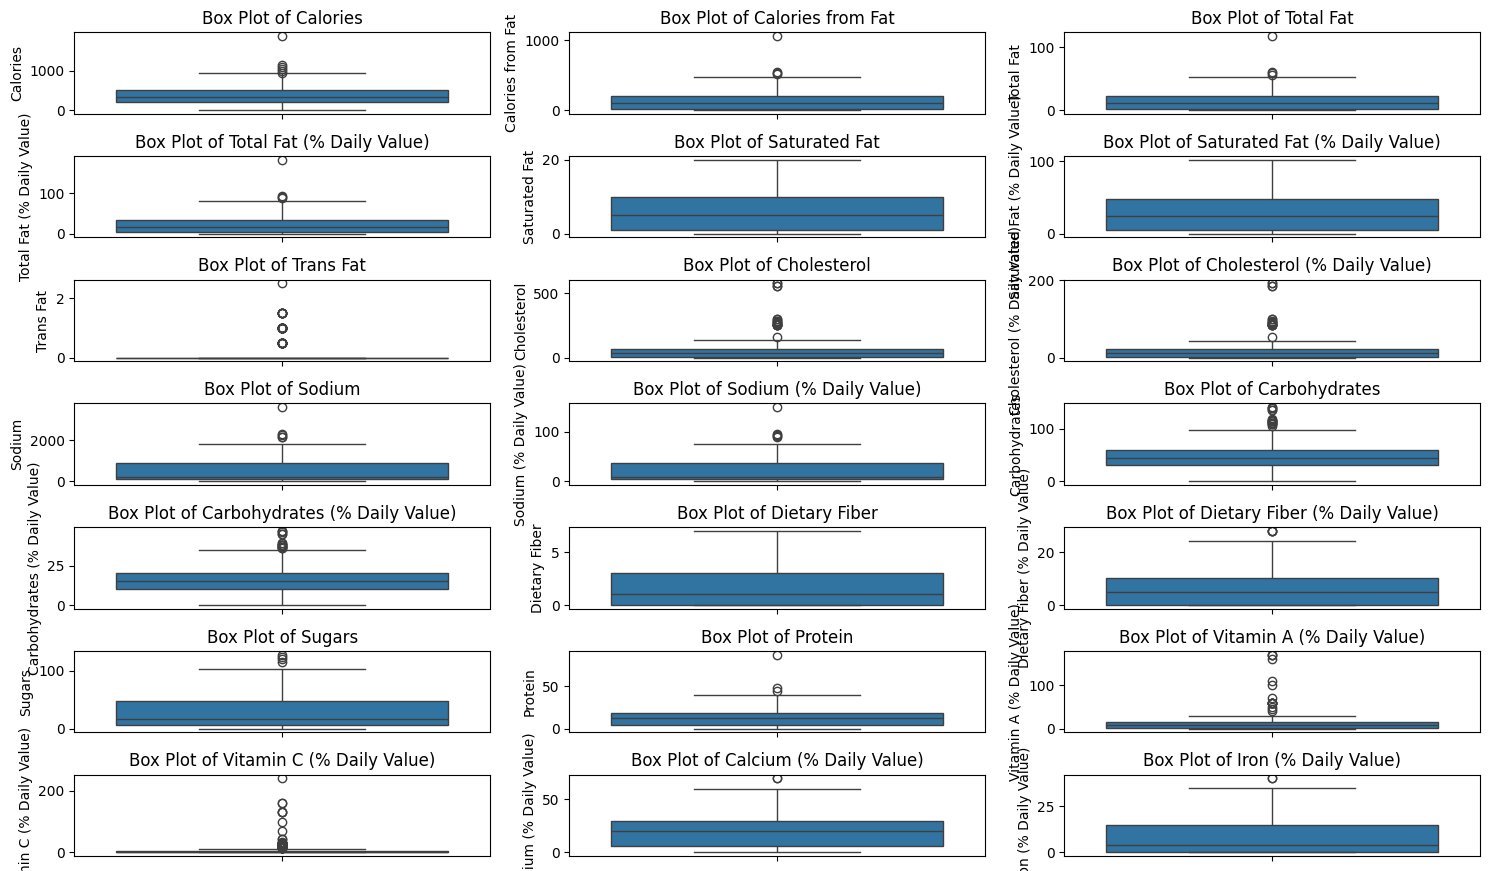

In [8]:
# Detect outliers using box plot visualization
plt.figure(figsize=(15, 10))
outlier_dict = {}
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

    # Detect outliers using box plot
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_dict[col] = outliers

plt.tight_layout()
plt.show()


##handle the outliers with out removing them due to less data in  the

In [9]:
# Handle outliers by capping them within acceptable bounds
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers have been handled using capping (Winsorization).")


Outliers have been handled using capping (Winsorization).


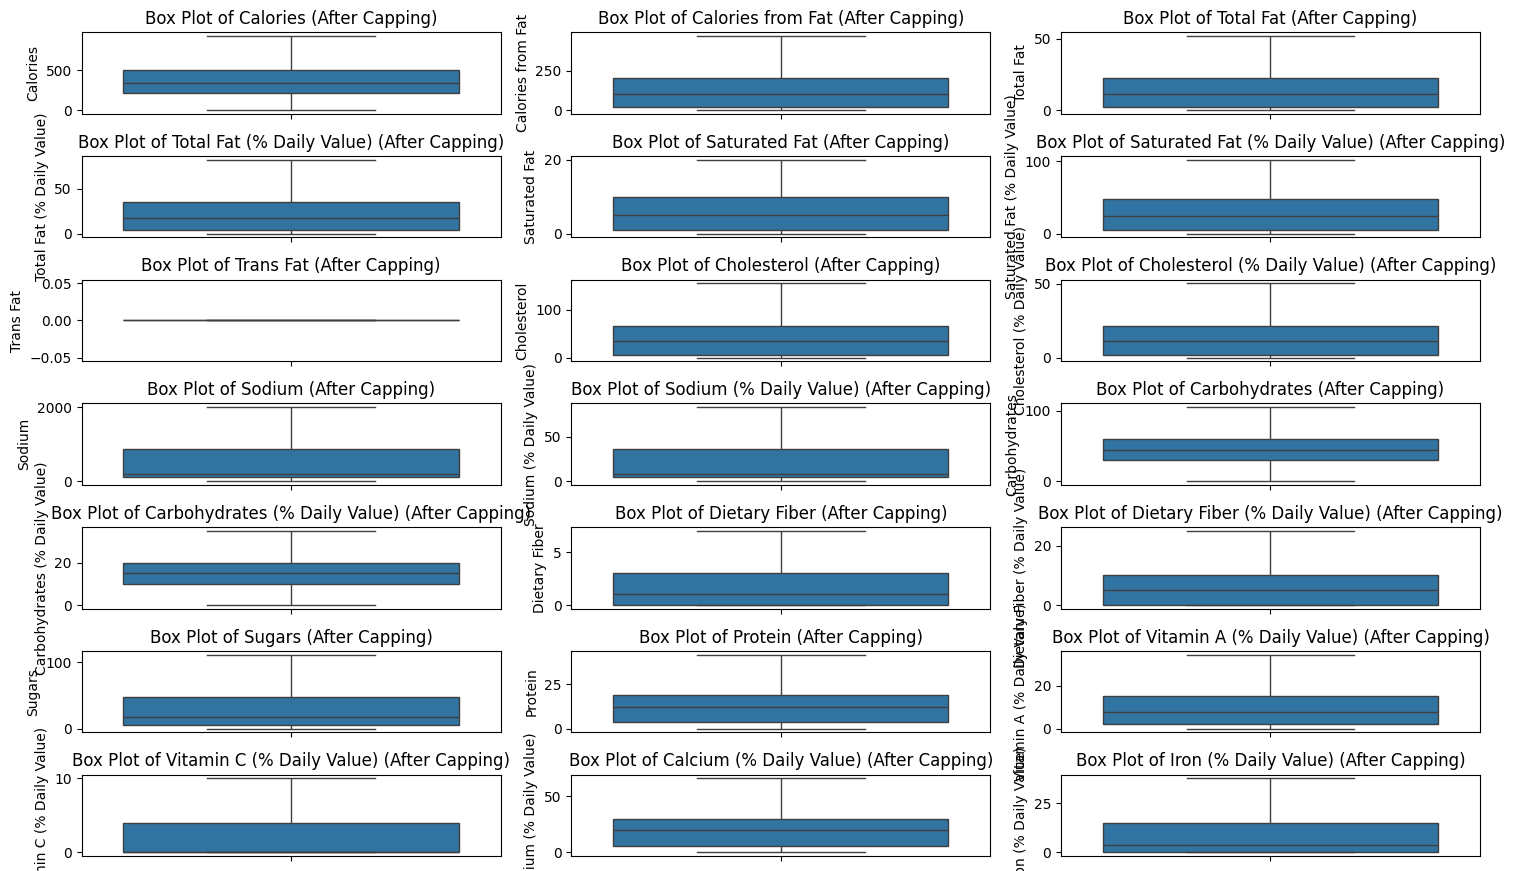

In [10]:
# Detect outliers again after capping
plt.figure(figsize=(15, 10))
outlier_dict_after_capping = {}
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (After Capping)')

    # Detect remaining outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_capping = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_dict_after_capping[col] = outliers_after_capping

plt.tight_layout()
plt.show()

In [11]:
df.shape

(260, 24)

In [12]:
#drop un wanted columns
drop_columns = [
    "Calories from Fat", "Sodium (% Daily Value)", "Cholesterol (% Daily Value)",
    "Carbohydrates (% Daily Value)", "Dietary Fiber (% Daily Value)"
]
df = df.drop(columns=drop_columns, errors='ignore')

In [13]:
df

,Category,Item,Serving Size,Calories,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,13.0,20.0,5.0,25.0,0.0,155.0,750.0,31.0,4.0,3.0,17.0,10.0,0.0,25.0,15.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250.0,8.0,12.0,3.0,15.0,0.0,25.0,770.0,30.0,4.0,3.0,18.0,6.0,0.0,25.0,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370.0,23.0,35.0,8.0,42.0,0.0,45.0,780.0,29.0,4.0,2.0,14.0,8.0,0.0,25.0,10.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,28.0,43.0,10.0,52.0,0.0,155.0,860.0,30.0,4.0,2.0,21.0,15.0,0.0,30.0,15.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,23.0,35.0,8.0,42.0,0.0,50.0,880.0,30.0,4.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510.0,17.0,26.0,9.0,44.0,0.0,45.0,280.0,80.0,1.0,64.0,12.0,15.0,0.0,40.0,8.0
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690.0,23.0,35.0,12.0,58.0,0.0,55.0,380.0,105.0,1.0,85.0,15.0,20.0,0.0,50.0,10.0
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340.0,11.0,17.0,6.0,29.0,0.0,30.0,190.0,53.0,1.0,43.0,8.0,10.0,0.0,25.0,6.0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810.0,32.0,50.0,15.0,76.0,0.0,60.0,400.0,105.0,2.0,103.0,21.0,20.0,0.0,60.0,6.0


In [14]:

# Save cleaned data to a CSV file
output_file = "cleaned_menu.csv"
df.to_csv(output_file, index=False)
print(f"Cleaned data saved to {output_file}")


Cleaned data saved to cleaned_menu.csv
